# Part 0 - The Kaplan-Meyer Estimator

Lets first familiarize ourselves with the Kaplan–Meier estimator. You might remember that its formula reads:

\begin{equation*}
\widehat S(t) = \prod\limits_{i:\ t_i\le t} \left( 1 - \frac{d_i}{n_i} \right)
\end{equation*}


Where $\widehat S(t)$ is the estimator for time $t$, $d_i$ the number of deaths at time $t_i$ and $n_i$ the number of individuals that are **known to have survived** until time $t_i$.

With this in mind, use the following data to calculate $\widehat S(t)$

|Subject|Survival Time|Status|
|---|---|---|
|Fly 1|1 day|Dead|
|Fly 2|2 days|Alive|
|Fly 3|3 days|Alive|
|Fly 4|4 days|Dead|
|Fly 5|5 days|Dead|
|Fly 6|6 days|Alive|
|Fly 7|7 days|Dead|
|Fly 8|8 days|Dead|
|Fly 9|9 days|Alive|
|Fly 10|10 days|Alive|



---

# Part 1 - Importing necessary packages

This will import the packages we will use during the workshop. If installation was done correctly, there should be no errors here.

In [2]:
%matplotlib inline

# Numerical library
import numpy as np

# Data manipulation
import pandas as pd
from patsy import dmatrix

# Ploting
import matplotlib
import matplotlib.pyplot as plt

# Survival analysis
import lifelines

# Part 2 - A look at the clinical data
The data is originally avaliable at http://www.cbioportal.org/study?id=brca_tcga_pub, but it can also be found together with this notebook at https://github.com/gjeuken/survival-workshop.

We will use here clinical data on the patients as well as gene expression data. Firstly, lets load the clinical data and see what it looks like. Make a note of all the variables (columns) avaliable in the data.

In [3]:
clinical = pd.read_csv('data/brca_tcga_pub_clinical_data.tsv', sep='\t')

with pd.option_context('display.max_columns', None):
    display(clinical)

,Patient ID,Sample ID,CN Cluster,Cancer Studies,Cancer Type,Cancer Type Detailed,Converted Stage,Diagnosis Age,ER Status,HER2 Status,Integrated Clusters (no exp),Integrated Clusters (unsup exp),Integrated Clusters (with PAM50),MIRNA Cluster,Metastasis,Metastasis-Coded,Methylation Cluster,Node,Node-Coded,Oncotree Code,Overall Survival (Months),Overall Survival Status,PAM50 subtype,PR Status,RPPA Cluster,Sex,SigClust Intrinsic mRNA,SigClust Unsupervised mRNA,Survival Data Form,Tumor Stage,Tumor--T1 Coded
0,TCGA-A2-A0T2,TCGA-A2-A0T2-01,3.0,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,No_Conversion,66.0,Negative,Negative,2.0,2.0,2.0,3.0,M1,Positive,5.0,N3,Positive,BRCA,7.89,DECEASED,Basal-like,Negative,Basal,Female,-13.0,0.0,followup,T3,T_Other
1,TCGA-A2-A04P,TCGA-A2-A04P-01,1.0,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,No_Conversion,36.0,Negative,Negative,2.0,2.0,2.0,5.0,M0,Negative,5.0,N3,Positive,BRCA,17.97,DECEASED,Basal-like,Negative,Basal,Female,-13.0,0.0,followup,T2,T_Other
2,TCGA-A1-A0SK,TCGA-A1-A0SK-01,1.0,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,Stage IIA,54.0,Negative,Negative,2.0,2.0,2.0,5.0,M0,Negative,5.0,N0,Negative,BRCA,31.77,DECEASED,Basal-like,Negative,Basal,Female,-13.0,-6.0,followup,T2,T_Other
3,TCGA-A2-A0CM,TCGA-A2-A0CM-01,4.0,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,Stage IIA,40.0,Negative,Negative,1.0,1.0,2.0,4.0,M0,Negative,4.0,N0,Negative,BRCA,24.77,DECEASED,Basal-like,Negative,Basal,Female,-13.0,-12.0,followup,T2,T_Other
4,TCGA-AR-A1AR,TCGA-AR-A1AR-01,1.0,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,Stage IIIA,50.0,Negative,Negative,NaN,NaN,NaN,5.0,M0,Negative,5.0,N2,Positive,BRCA,17.18,DECEASED,Basal-like,Negative,NaN,Female,-13.0,0.0,enrollment,T1,T1
5,TCGA-B6-A0WX,TCGA-B6-A0WX-01,1.0,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,No_Conversion,40.0,Negative,Negative,2.0,2.0,2.0,4.0,M0,Negative,5.0,N1,Positive,BRCA,21.45,DECEASED,Basal-like,Negative,X,Female,-13.0,0.0,followup,T3,T_Other
6,TCGA-BH-A1F0,TCGA-BH-A1F0-01,1.0,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,Stage IIA,80.0,Negative,Negative,NaN,NaN,NaN,6.0,M0,Negative,5.0,N1,Positive,BRCA,25.79,DECEASED,Basal-like,Indeterminate,NaN,Female,-13.0,-12.0,enrollment,T1,T1
7,TCGA-B6-A0I6,TCGA-B6-A0I6-01,NaN,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,No_Conversion,49.0,Negative,NaN,NaN,NaN,NaN,4.0,M0,Negative,5.0,N1,Positive,BRCA,32.76,DECEASED,Basal-like,Negative,Basal,Female,-13.0,0.0,followup,T1,T1
8,TCGA-BH-A18V,TCGA-BH-A18V-01,1.0,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,No_Conversion,48.0,Negative,Negative,2.0,2.0,2.0,5.0,M0,Negative,5.0,N1,Positive,BRCA,51.09,DECEASED,Basal-like,Negative,Basal,Female,-13.0,-12.0,enrollment,T2,T_Other
9,TCGA-BH-A18Q,TCGA-BH-A18Q-01,1.0,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,No_Conversion,56.0,Negative,Negative,2.0,2.0,2.0,5.0,M0,Negative,5.0,N1,Positive,BRCA,55.59,DECEASED,Basal-like,Negative,Basal,Female,-13.0,-12.0,enrollment,T2,T_Other


To make the later survival analysis easier, we create two new columns, one for the survival in days, and one for the event (death) beign present.

In [4]:
clinical['Time'] = clinical['Overall Survival (Months)']*30
clinical['Event'] = (clinical['Overall Survival Status'] == 'DECEASED')*1

Now, lets plot how the survival data looks like

(818, 2)


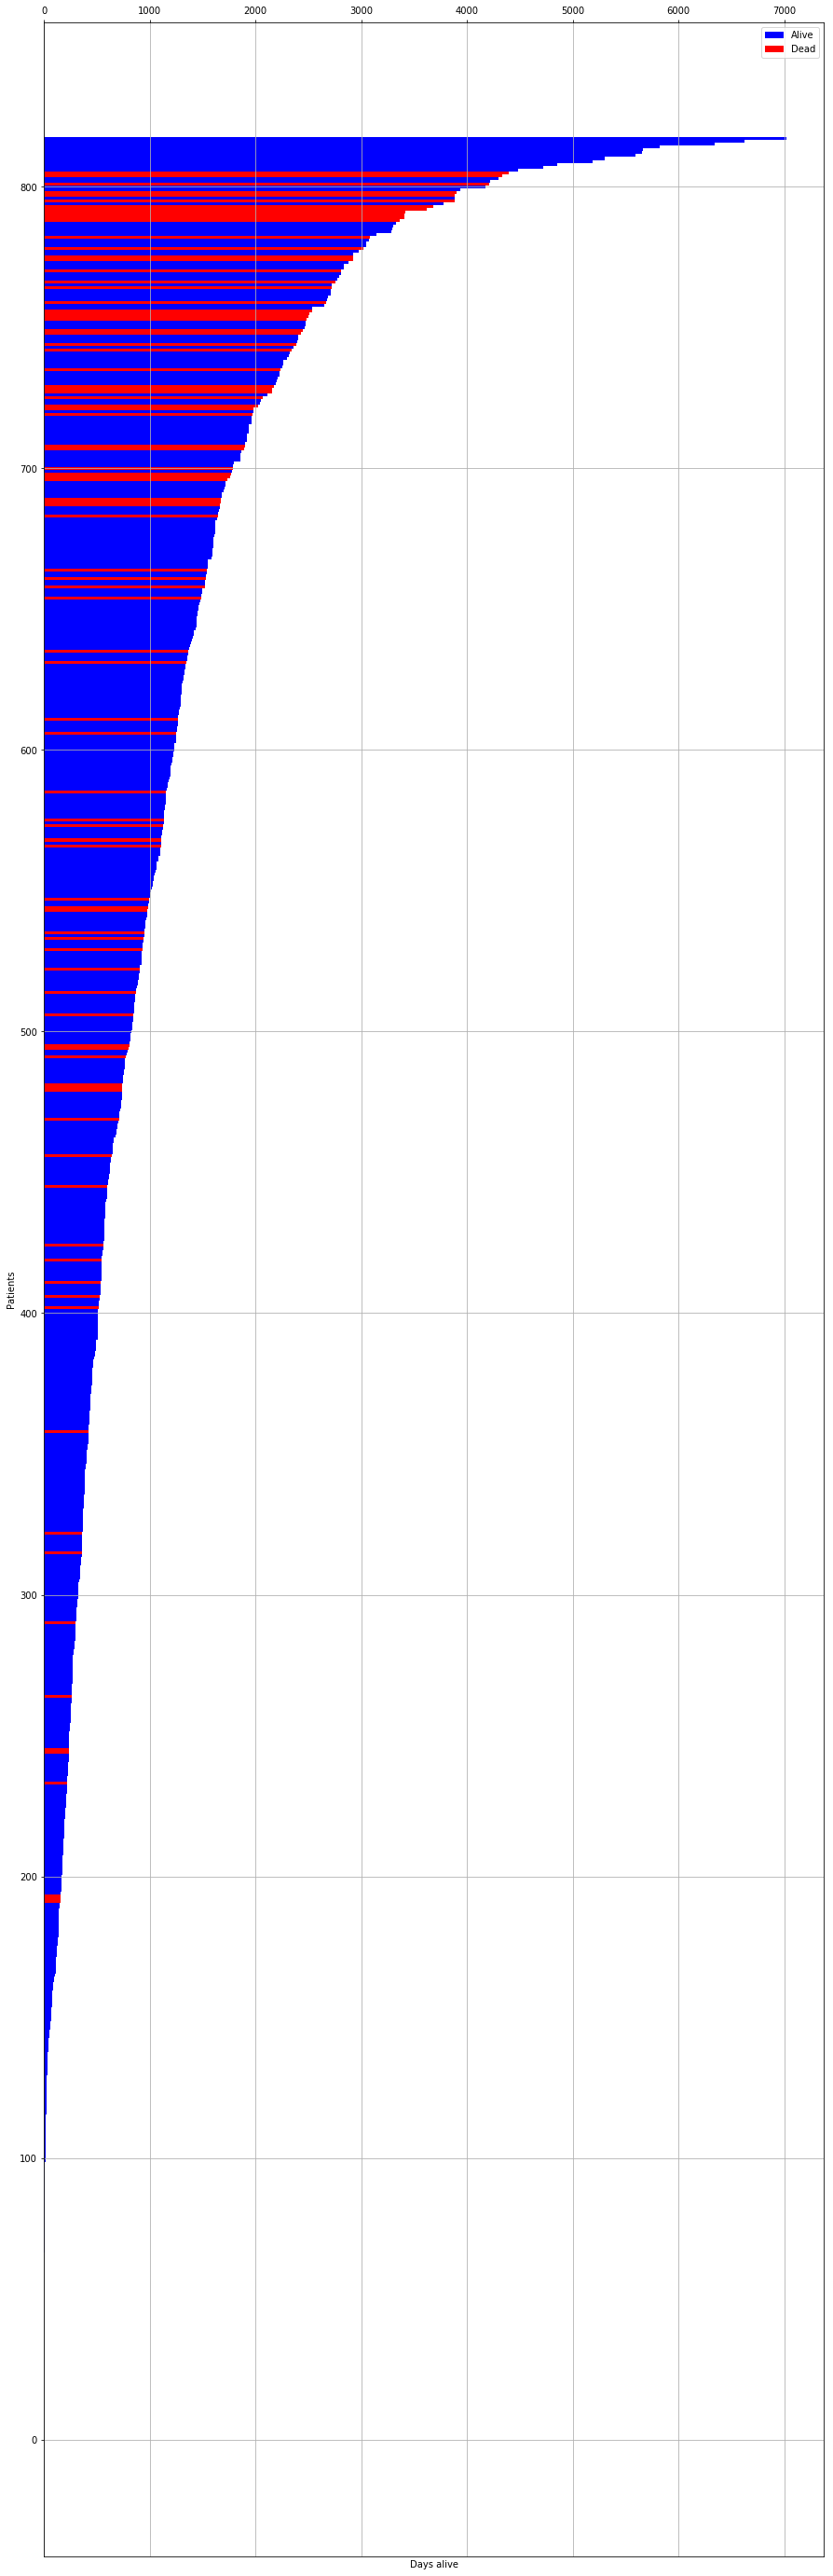

In [5]:
matplotlib.rcParams['figure.figsize'] = [15, 50]

data_sorted = clinical[['Time','Event']].sort_values(by = 'Time').dropna().reset_index(drop=True)
print(data_sorted.shape)
status_slice = data_sorted['Event'] == 1

fig, ax = plt.subplots()

ax.barh(data_sorted.loc[~status_slice].index, data_sorted.loc[~status_slice,'Time'], height = 1, color = 'b')
ax.barh(data_sorted.loc[status_slice].index, data_sorted.loc[status_slice,'Time'], height = 1, color = 'r')

ax.set_xlabel('Days alive')
ax.set_ylabel('Patients')
ax.legend(['Alive', 'Dead'])
ax.xaxis.tick_top()
ax.grid()

---
### Exercises
1.1 Describe the plot and what inferences you are able to make from it

---
# Part 3 - Survival analysis using the clinical data



Ok, now that we've seen the data, lets play around with it.

How does the survival curve looks like in general? We can use the survival package __lifelines__ to figure this out, and generate a *Kaplan Meier plot*. 

We will also compare the Kaplan Meier estimate for $S(t)$ with a naive estimate.

(0, 1)

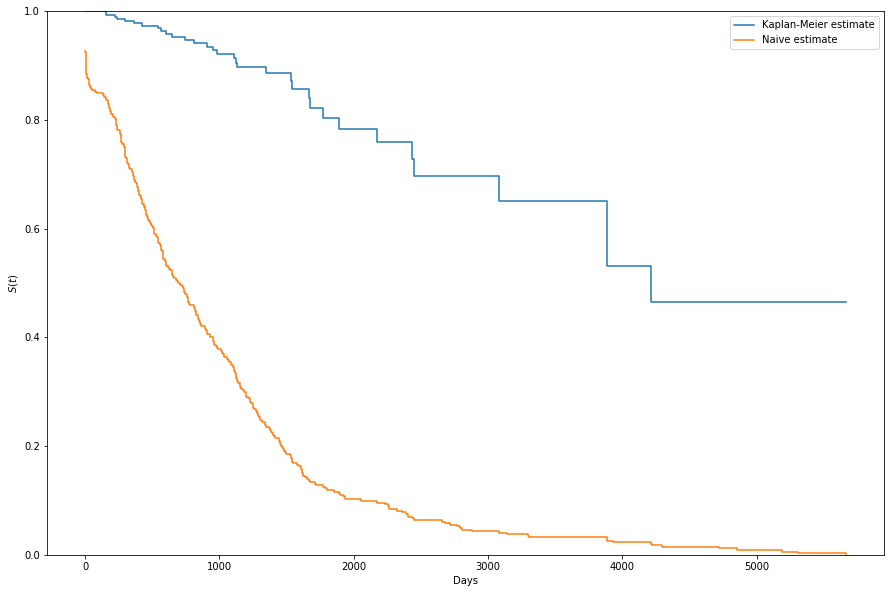

In [7]:
kmf = lifelines.KaplanMeierFitter()
kmf_naive = lifelines.KaplanMeierFitter()

clinical = clinical.dropna()

kmf.fit(clinical['Time'], clinical['Event'])
kmf_naive.fit(clinical['Time'], np.repeat(1, len(clinical['Time'])))

matplotlib.rcParams['figure.figsize'] = [15, 10]
ax = kmf.plot(ci_show=False)
kmf_naive.plot(ax=ax, ci_show=False)
plt.legend(['Kaplan-Meier estimate','Naive estimate'])
plt.xlabel('Days')
plt.ylabel('$S(t)$')
plt.ylim([0,1])


---
### Exercises

2.1 Why are both estimates so different? Can you relate your answer to the fist plot and the data?

2.2 Compare the Kaplan Meier plot with the first one, what additional insights are avaliable on this latter plot?

2.3 What are the common features of the two plots?

---

Now we can start to play around with clinical variables that might influence in the survival curve.

You should play around with the groupings and see if you can find some usefull insight

Text(0.5,1,'Metastasis')

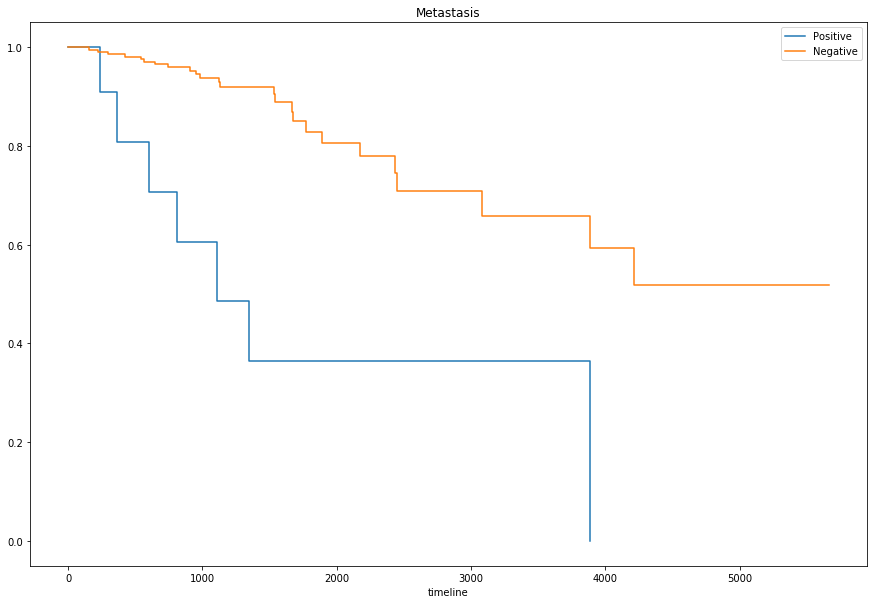

In [8]:
### Define groups here
group_1 = clinical.loc[clinical['Metastasis-Coded'] == 'Positive']
group_2 = clinical.loc[clinical['Metastasis-Coded'] == 'Negative']
###

kmf.fit(group_1['Time'], group_1['Event'], label='Positive')
ax = kmf.plot(ci_show=False)

kmf.fit(group_2['Time'], group_2['Event'], label='Negative')
kmf.plot(ax=ax, ci_show=False)

plt.title('Metastasis')

---
### Exercises
3.1 Make at least 3 plots using relevant separation criteria, and lable them accordingly. Why did you chose this criteria? Are the results as expected?

3.2 Make a plot that includes the survival curve for 3 different age groups. Do the results make sense?

3.3 The [**logrank_test** function](http://lifelines.readthedocs.io/en/latest/Examples.html?compare-using-a-hypothesis-test#compare-using-a-hypothesis-test) of the **lifelines** package performs a statistical test on the two groups to see if their event (death) generation process is the same. Use this function to obtain a significance statistic for the separations above.

---

# Part 4 - Cox Proportional Hazards model

We will now introduce the Cox Proportional Hazards (CPH) model. To do so, lets first define the hazard function:

\begin{equation*}
\lambda(t) = \lim_{dt \rightarrow 0} \frac{\Pr(t \leq T < t+dt)}{dt\cdot S(t)} = \frac{f(t)}{S(t)} = - \frac{S'(t)}{S(t)}
\end{equation*}

To understand the model, we first need to understand its assumptions. The main assumption here (proportional hazards condition) states that covariates are multiplicatively related to the hazard, or in other words, a change in the covariate will have an effect on the hazard rate that is proportional to the magnitude of that change.

Now we can in intoduce the model. The formula for CPH reads:

\begin{equation*}
\lambda(t|X_i) = \lambda_0(t)\exp(\beta_1X_{i1} + \cdots + \beta_pX_{ip}) = \lambda_0(t)\exp(X_i \cdot \beta)
\end{equation*}

Where $X_i = \{X_{i,1}, X_{i,2}, \dots, X_{i,p}\}$ are the realized values of the covariates for subject $i$, $\lambda_0(t)$ is the *baseline* hazard rate, and $\beta_i$ are the coefficients of proportionality.
With a careful read, you can see how this equation relates to the assumption discussed. If you want to read more about the model, and specially how the coefficients are calculated, a great place to start is the [Wikipedia page](https://en.wikipedia.org/wiki/Proportional_hazards_model).

The next step is to use the Cox Proportional Hazards regression in the data. 
First, let's check the main assumption of the model, the proportionality of hazards, by ploting the hazard functions on a log-log scale and seeing wether they "look" parallel or not. We will do this for a few covariates.

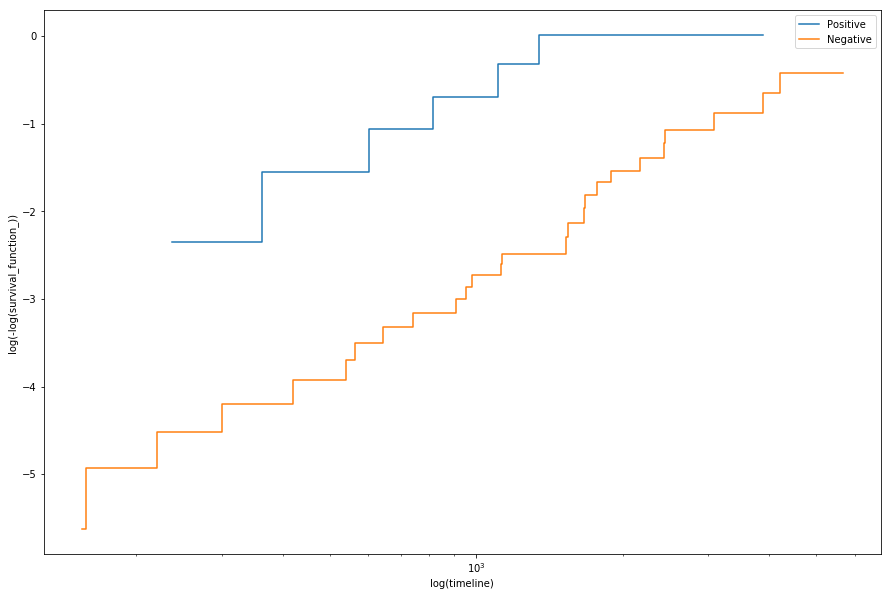

In [9]:
### Define groups here
group_1 = clinical.loc[clinical['Metastasis-Coded'] == 'Positive']
group_2 = clinical.loc[clinical['Metastasis-Coded'] == 'Negative']
###

kmf.fit(group_1['Time'], group_1['Event'], label='Positive')
ax = kmf.plot_loglogs()

kmf.fit(group_2['Time'], group_2['Event'], label='Negative')
kmf.plot_loglogs(ax=ax)

---
### Exercises

4.1 Can you explain what the baseline hazard means?

4.2 Why can we test our hypothesis by looking at the plot above?

4.3 In your oppinion, does the proportional hazards assumption hold for the Metastasis case? What about other variables you used on the previous exercise? Use the plots to support your claims.

---

Now that we checked the proportional hazards assumption, we can perform the CPH regression on the categorical data where this assumption holds.

Note that here we will use the [patsy package](https://patsy.readthedocs.io/en/latest/) to format our categorical data in a way that is suited for the regression. If you are not familiar with this type of representation, please take a moment to familiriarize yourself in the [relevant help page](https://patsy.readthedocs.io/en/latest/categorical-coding.html).




,coef,exp(coef),se(coef),z,p,lower 0.95,upper 0.95
"C(Q(""Metastasis""), levels=l)[T.M1]",1.500400,4.483484,0.455331,3.295185,0.000984,0.607968,2.392833
"Q(""Diagnosis Age"")",0.021385,1.021615,0.014772,1.447645,0.147716,-0.007568,0.050338


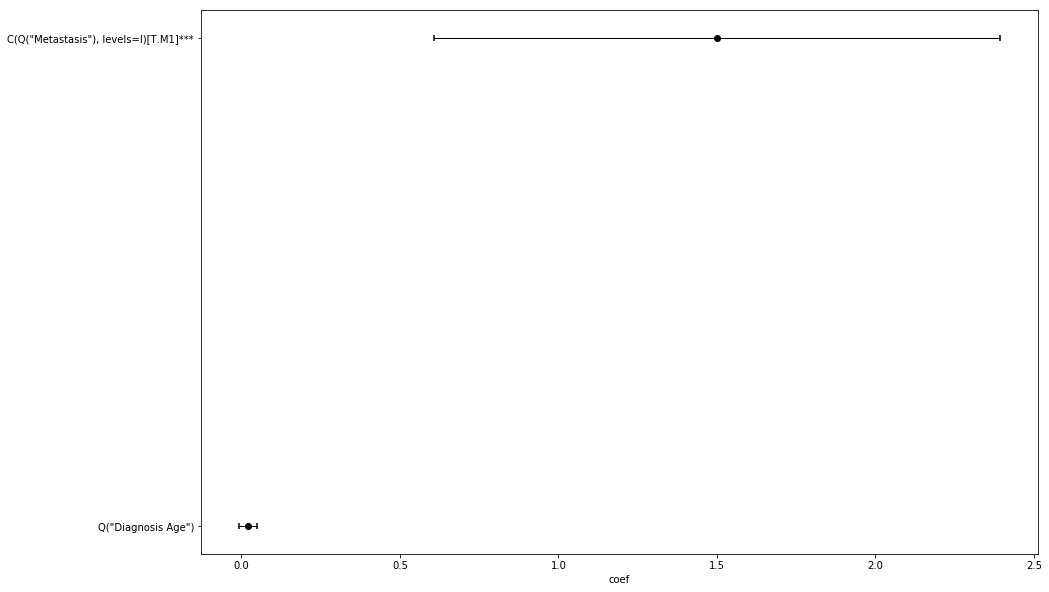

In [19]:
cph = lifelines.CoxPHFitter()

formula = 'Time + Event + C(Q("Metastasis"), levels = l) + Q("Diagnosis Age")'

l = ['M0', 'M1']


cox_input = dmatrix(formula, data = clinical, return_type = 'dataframe')
cox_input = cox_input.drop(['Intercept'], axis = 1)

cph.fit(cox_input, duration_col='Time', event_col='Event')

cph.plot()
cph.summary

---
### Exercises
5.1 For the regression performed above (Metastasis + Age), compare both coeficients. What can you learn from them?

5.2 Perform the CPH regression using a few variables where the proportional hazard assumption hold.

5.3 Try adding more than one variable in the same regression. What happens then? Explain the results.

5.4 If there are variables where the proportional hazard assumption does not hold, but hold predictive power, you might still use it for <a href="https://en.wikipedia.org/wiki/Blocking_(statistics)">blocking</a>. How do the results change then? [Help](http://lifelines.readthedocs.io/en/latest/Survival%20Regression.html#stratification)

5.5 Can you find a way to plot the survival curves predicted by the regression for each level of a categorical variable? (Remember the CPH assumpions)

---

# Part 5 - Incorporating gene expression data

It's time to look at the gene expression data! This data is generated using RNASeq on tumor tissue. 

First we load the expression data for the same samples. This may take some time, be patient.

We then take a look on how the data looks like. Note that the gene expression has been median normalized, so we get negative gene expression here.

In [11]:
expression_raw  = pd.read_csv('data/data_expression_median.txt', sep='\t')
expression = expression_raw.set_index('Hugo_Symbol').iloc[:,1:].T
expression

Hugo_Symbol,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,APBB2,...,SLC2A11,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC
TCGA-A1-A0SD-01,1.43450,0.765000,0.52600,1.506000,-2.018250,0.043333,-0.10725,0.103125,-0.0620,1.85600,...,0.280333,-0.25000,-0.667167,-0.0308,0.3870,1.96725,0.6645,0.0766,-0.6560,-0.9941
TCGA-A1-A0SE-01,0.89075,0.716000,0.13175,0.957833,-0.590250,-0.043667,-0.23850,-0.152250,0.4425,1.52475,...,0.185833,-0.18750,-0.440000,0.5352,0.2570,2.81075,2.0736,-0.0675,-1.0095,-1.1553
TCGA-A1-A0SH-01,2.25925,0.417125,0.32500,2.285500,-1.726750,0.420500,0.00725,-0.696000,0.2960,2.12700,...,-0.001333,-0.26900,-0.996667,0.8484,0.6025,2.36950,0.5013,-0.1963,-1.0765,-0.7658
TCGA-A1-A0SJ-01,0.43775,0.115000,0.75775,-0.089333,-1.783750,0.251000,0.03525,-0.640625,0.6885,2.10675,...,0.455333,0.00025,-0.099500,0.1940,-0.1235,2.85725,3.0967,0.3321,1.5910,-0.7459
TCGA-A1-A0SK-01,-0.63725,0.492875,0.94325,-1.233167,-2.755000,-1.331500,0.79100,0.014500,-0.0600,0.95550,...,-0.669333,-0.11650,-0.634167,0.8949,0.0855,1.86000,-0.4288,0.0048,-1.0275,-0.6338
TCGA-A1-A0SM-01,2.58000,-0.525000,0.64175,1.591500,-1.869750,0.059833,-0.17725,0.091875,0.1710,0.86200,...,-0.480333,-0.32475,-1.282167,0.7529,0.6820,2.63200,0.7469,-0.7540,-1.0140,-0.9661
TCGA-A1-A0SO-01,-0.70750,-0.169000,-0.06425,-1.396500,-2.275000,-0.907500,-0.13650,-0.743875,0.8305,-0.34800,...,-0.213167,-0.17600,0.719500,-0.0030,-0.4330,1.69450,-1.4874,0.5548,-0.9815,-0.5639
TCGA-A1-A0SP-01,0.16675,0.396000,0.02600,-0.260500,-2.133500,-1.090667,-0.56675,-1.448500,0.7785,0.38300,...,-0.130833,-0.30950,-0.811500,0.3926,-0.3370,1.23125,-1.4531,0.1176,-0.5720,0.5423
TCGA-A2-A04N-01,1.18425,0.504750,0.53325,0.583000,-1.649000,-0.183667,0.46675,0.383625,0.2610,2.46725,...,-0.270667,-0.39000,-1.203500,-0.7215,0.9085,1.37325,1.0834,0.6446,-1.0025,-0.1929
TCGA-A2-A04P-01,0.96650,0.400875,-1.72625,-0.716333,1.336750,-0.253833,0.42300,-0.235625,1.1025,-0.35775,...,-0.626333,-0.01050,-0.967000,1.2088,0.9995,0.51000,-3.7138,0.4483,0.0825,0.3699


Now we merge the clinical and expression data in one big datastructure, and display the result.

In [12]:
data = clinical.merge(expression, how='inner', left_on='Sample ID', right_index=True)
data

,Patient ID,Sample ID,CN Cluster,Cancer Studies,Cancer Type,Cancer Type Detailed,Converted Stage,Diagnosis Age,ER Status,HER2 Status,...,SLC2A11,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC
0,TCGA-A2-A0T2,TCGA-A2-A0T2-01,3.0,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,No_Conversion,66.0,Negative,Negative,...,0.772667,0.03325,-0.945667,0.2620,0.9770,0.89500,-0.8492,0.1878,-1.4735,-0.6457
1,TCGA-A2-A04P,TCGA-A2-A04P-01,1.0,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,No_Conversion,36.0,Negative,Negative,...,-0.626333,-0.01050,-0.967000,1.2088,0.9995,0.51000,-3.7138,0.4483,0.0825,0.3699
2,TCGA-A1-A0SK,TCGA-A1-A0SK-01,1.0,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,Stage IIA,54.0,Negative,Negative,...,-0.669333,-0.11650,-0.634167,0.8949,0.0855,1.86000,-0.4288,0.0048,-1.0275,-0.6338
3,TCGA-A2-A0CM,TCGA-A2-A0CM-01,4.0,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,Stage IIA,40.0,Negative,Negative,...,-0.677167,-0.04975,-1.223333,0.1969,0.7275,1.53775,-2.2197,0.3574,-1.3070,0.1510
5,TCGA-B6-A0WX,TCGA-B6-A0WX-01,1.0,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,No_Conversion,40.0,Negative,Negative,...,0.057500,-0.28875,-0.070000,-0.3534,-0.2130,1.52700,-0.7971,-0.4257,-0.2605,-0.8647
8,TCGA-BH-A18V,TCGA-BH-A18V-01,1.0,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,No_Conversion,48.0,Negative,Negative,...,-0.235500,-0.22275,-0.835167,0.8030,0.2495,0.77775,-1.9864,0.7179,-0.6990,1.2695
9,TCGA-BH-A18Q,TCGA-BH-A18Q-01,1.0,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,No_Conversion,56.0,Negative,Negative,...,1.460500,-0.94750,-0.329000,-0.0938,0.3785,1.95675,-0.2088,-0.0945,-1.5795,-0.0888
12,TCGA-BH-A0E0,TCGA-BH-A0E0-01,1.0,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,No_Conversion,38.0,Negative,Negative,...,0.537833,-0.56875,0.640333,-0.1710,0.0800,0.35050,-1.8702,0.8057,-1.1555,0.3399
13,TCGA-BH-A0RX,TCGA-BH-A0RX-01,4.0,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,Stage IIA,59.0,Negative,Negative,...,-0.115833,-0.26125,-1.135500,0.6147,-0.5630,1.13350,-0.6898,0.2078,-0.6510,1.2357
14,TCGA-A7-A13D,TCGA-A7-A13D-01,3.0,brca_tcga_pub,Breast Cancer,Invasive Breast Carcinoma,Stage IIA,46.0,Negative,Negative,...,-0.871333,-0.63300,-1.346600,0.1444,0.2750,1.14400,-2.1639,1.3578,-0.0540,-0.1148


---
### Exercises

6.1 How many genes are there in the data? Is there any gene you think might be relevant for the survival time in breast cancer?

----

Lets incorporate the data in our study. We will start with the Kaplan–Meier estimator, and to do so, we will have to separate our subjects in groups acording to gene expression levels.
We will next plot the Kaplan–Meier estimates, together with the results of the statistical test.


<lifelines.StatisticalResult: 

t_0=-1, alpha=0.95, null_distribution=chi squared, df=1

test_statistic      p   
        2.5136 0.1129
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
>

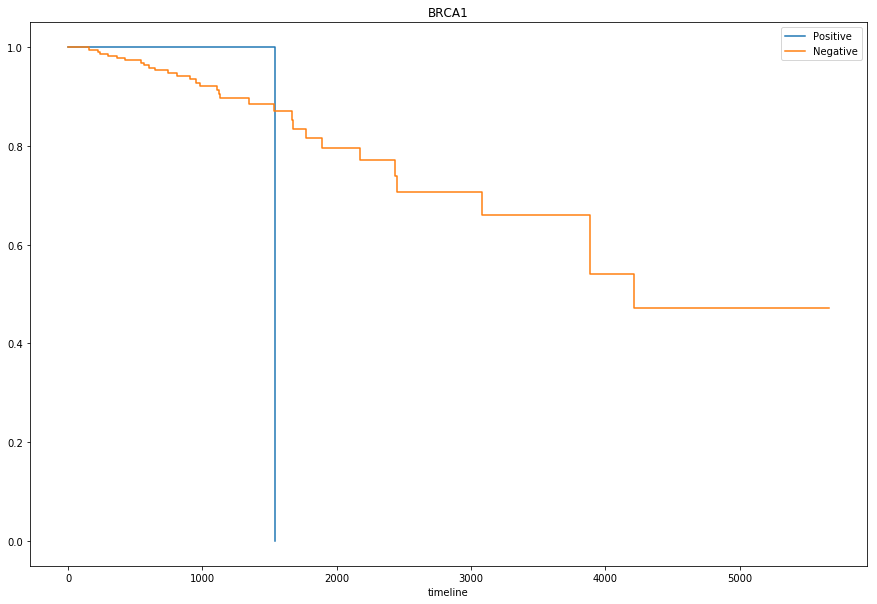

In [30]:
from lifelines.statistics import logrank_test

### Define groups here
treshold = 0

group_1 = data.loc[data['BRCA1'] > treshold]
group_2 = data.loc[data['BRCA1'] < treshold]
###

kmf.fit(group_1['Time'], group_1['Event'], label='Positive')
ax = kmf.plot(ci_show=False)

kmf.fit(group_2['Time'], group_2['Event'], label='Negative')
kmf.plot(ax=ax, ci_show=False)

plt.title('BRCA1')

p_val = logrank_test(group_1['Time'], group_2['Time'], event_observed_A=group_1['Event'], event_observed_B=group_2['Event'])
p_val

We can also do the same for the CPH model. Let's incorporate the gene expression data into our Cox regression

,coef,exp(coef),se(coef),z,p,lower 0.95,upper 0.95
BRCA1,0.473768,1.606034,0.267879,1.768587,0.076963,-0.051266,0.998802


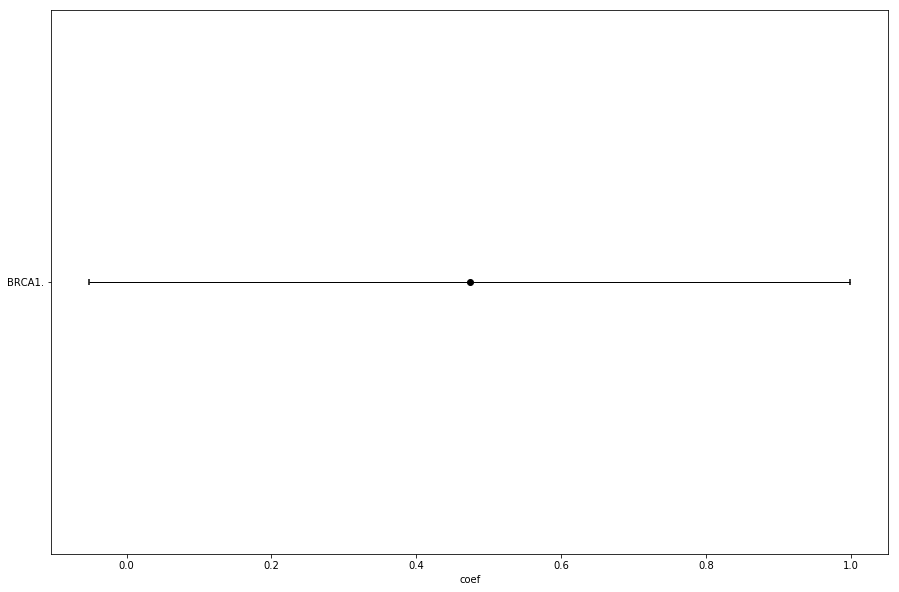

In [13]:
formula = 'Time + Event + BRCA1'

cox_input = dmatrix(formula, data = data, return_type = 'dataframe')
cox_input = cox_input.drop(['Intercept'], axis = 1)

cph.fit(cox_input, duration_col='Time', event_col='Event')

cph.plot()
cph.summary

---
### Exercises
8.1 Perform the CPH regression with some genes of your choice. Did you find any gene that has a significant influence in the survival rate for breast cancer?

8.2 You may want to write a code that automaticaly test all the genes and outputs all the relevant genes and their regression coefficients in the end.

8.3 Now try multiple combinations of the genes in the same regression, start with the genes found in the previous exercise. Again, do the results change? Why?